<div dir="rtl">


* چگونه تعادل برای مجموعه داده‌های نامتعادل انجام می‌شود
* چگونه رمزگذاری برچسب برای متغیرهای دسته‌ای انجام می‌شود
* چگونه روش‌های پیشرفته مانند MICE برای تکمیل داده‌ها استفاده می‌شوند
* چگونه می‌توان نقاط ناگوار را شناسایی کرده و از داده‌ها حذف کرد
* چگونه روش‌های فیلتر و پوشش برای انتخاب ویژگی‌ها استفاده می‌شوند
* چگونه می‌توان مقایسه کرد تعادل سرعت و عملکرد برای مدل‌های محبوب مختلف
* کدام معیار می‌تواند بهترین معیار برای ارزیابی عملکرد در مجموعه داده‌های نامتعادل باشد: دقت (Accuracy)، اسکور F1 یا کاپا کوئن (Cohen's Kappa)

<div dir="rtl">


# وارد کردن داده‌ها

In [1]:
import pandas as pd
full_data = pd.read_csv('weatherAUS.csv')
full_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

<div dir="rtl">


# بررسی داده‌ها
ابتدا تعداد ردیف‌ها و ستون‌ها را بررسی خواهیم کرد. سپس اندازه مجموعه داده را برای تصمیم‌گیری در مورد نیاز به فشرده‌سازی اندازه آن بررسی خواهیم کرد.

In [2]:
full_data.shape

(142193, 24)

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

<div dir="rtl">

هر دو "RainToday" و "RainTomorrow" اشیاء هستند (بله/خیر). ما آن‌ها را به صورت دودویی (1/0) برای راحتی خود تبدیل خواهیم کرد.

In [4]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

<div dir="rtl">بعداً، ما بررسی خواهیم کرد که آیا مجموعه داده ناهمواره است یا متوازن. اگر مجموعه داده ناهموار باشد، ما نیاز داریم که تعداد نمونه‌های اکثریت را کاهش دهیم یا تعداد نمونه‌های اقلیت را افزایش دهیم تا آن را متوازن کنیم.

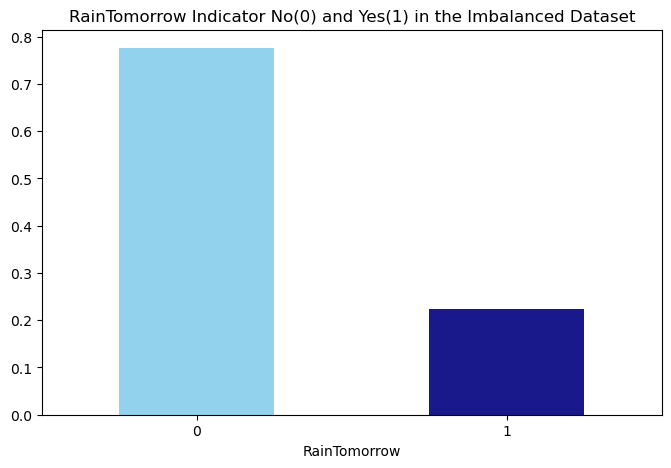

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

<div dir="rtl">

می‌توانیم مشاهده کنیم که حضور "0" و "1" تقریباً به نسبت ۷۸ به ۲ است. بنابراین تراز کلاس وجود دارد و ما باید با آن برخورد کنیم. برای مقابله با تراز کلاس، ما در اینجا از **افزایش تعداد نمونه‌های کلاس اقلیت** استفاده خواهیم کرد. از آنجا که اندازه مجموعه داده به نسبت کوچک است، کاهش تعداد نمونه‌های کلاس اکثریت در اینجا معنی زیادی نخواهد داشت.

<div dir="rtl">

# مدیریت عدم توازن کلاس‌ها

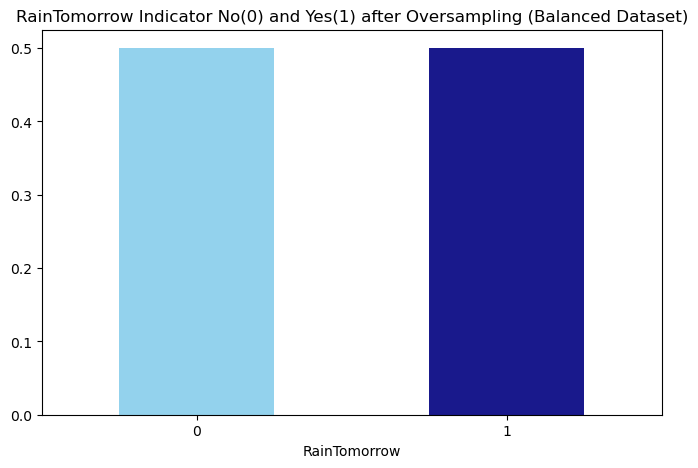

In [6]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<div dir="rtl">حالا، ما اکنون الگوی داده‌های از دست رفته را در مجموعه داده بررسی خواهیم کرد.

<Axes: >

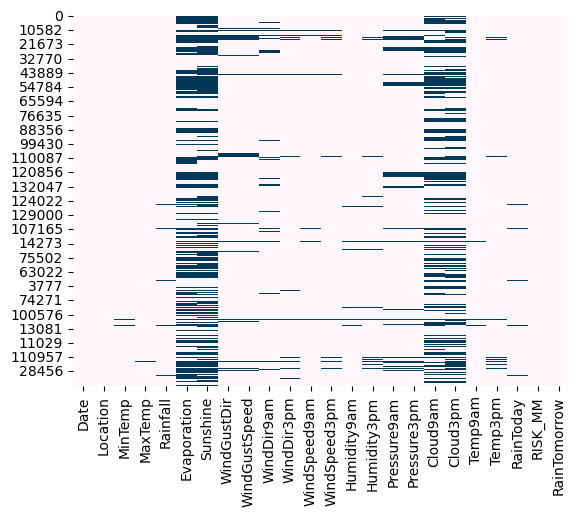

In [7]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

<div dir="rtl">

بطور قابل‌مشاهده، 'تبخیر'، 'تابش نور خورشید'، 'ابرهای ساعت 9 صبح' و 'ابرهای ساعت 3 بعد از ظهر' ویژگی‌هایی هستند که درصد بالایی از داده‌ها در آن‌ها از دست رفته است. بنابراین، ما جزئیات داده‌های از دست رفته برای این 4 ویژگی را بررسی خواهیم کرد.

In [8]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

Total   Percent
Sunshine     104831  0.475140
Evaporation   95411  0.432444
Cloud3pm      85614  0.388040
Cloud9am      81339  0.368664

<div dir="rtl">ما مشاهده می‌کنیم که همه چهار ویژگی دارای داده‌های گم‌شده کمتر از ۵۰٪ هستند. بنابراین به جای کاملاً حذف آن‌ها، ما آن‌ها را با روش‌های مناسب در مدل خود در نظر خواهیم گرفت.

<div dir="rtl">

# تکمیل و تبدیل داده
در این مرحله، ستون‌های دسته‌ای را با استفاده از مد تکمیل کرده و سپس از رمزگذار برچسبی برای تبدیل آن‌ها به متغیرهای عددی استفاده می‌کنیم. بعد از آن، به کمک بسته MICE (Multiple Imputation by Chained Equations)، مقادیر گم‌شده (مانند NaN و غیره) را تکمیل می‌کنیم. سپس، با استفاده از محدوده بین‌کارها (Inter-Quartile Range)، نقاط نادرست را شناسایی کرده و آن‌ها را حذف کرده و به مجموعه داده نهایی می‌رسیم. در نهایت، ارتباط بین متغیرهای مختلف را بررسی کرده و اگر هر گونه جفت متغیر با ارتباط بالایی پیدا کنیم، یکی از آن‌ها را حذف کرده و دیگری را حفظ می‌کنیم.


In [9]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [10]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [11]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [14]:
MiceImputed.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0   396         2     13.4     22.9       0.6     5.735438   7.364116   
1   397         2      7.4     25.1       0.0     5.639582  11.470601   
2   398         2     12.9     25.7       0.0     7.762987  12.281872   
3   399         2      9.2     28.0       0.0     5.977338  11.743982   
4   400         2     17.5     32.3       1.0     6.852950   5.756442   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0           13           44.0          13  ...         22.0       1007.7   
1           14           44.0           6  ...         25.0       1010.6   
2           15           46.0          13  ...         30.0       1007.6   
3            4           24.0           9  ...         16.0       1017.6   
4           13           41.0           1  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1  8.000000  4.868720     16.9     21.8        0.0      0.0   
1       1007.8  1.734671  2.639541     17.2     24.3        0.0      0.0   
2       1008.7  1.820254  2.000000     21.0     23.2        0.0      0.0   
3       1012.8  1.236006  2.133027     18.1     26.5        0.0      1.0   
4       1006.0  7.000000  8.000000     17.8     29.7        0.0      0.2   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 24 columns]

<div dir="rtl">حالا، ما بررسی می‌کنیم که آیا تمام مقادیر "NaN" به طور کامل ترمیم شده‌اند یا خیر.

In [15]:
MiceImputed.isna()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       False     False    False    False     False        False     False   
1       False     False    False    False     False        False     False   
2       False     False    False    False     False        False     False   
3       False     False    False    False     False        False     False   
4       False     False    False    False     False        False     False   
...       ...       ...      ...      ...       ...          ...       ...   
130416  False     False    False    False     False        False     False   
114384  False     False    False    False     False        False     False   
84962   False     False    False    False     False        False     False   
54992   False     False    False    False     False        False     False   
26599   False     False    False    False     False        False     False   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0             False          False       False  ...        False        False   
1             False          False       False  ...        False        False   
2             False          False       False  ...        False        False   
3             False          False       False  ...        False        False   
4             False          False       False  ...        False        False   
...             ...            ...         ...  ...          ...          ...   
130416        False          False       False  ...        False        False   
114384        False          False       False  ...        False        False   
84962         False          False       False  ...        False        False   
54992         False          False       False  ...        False        False   
26599         False          False       False  ...        False        False   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0             False     False     False    False    False      False    False   
1             False     False     False    False    False      False    False   
2             False     False     False    False    False      False    False   
3             False     False     False    False    False      False    False   
4             False     False     False    False    False      False    False   
...             ...       ...       ...      ...      ...        ...      ...   
130416        False     False     False    False    False      False    False   
114384        False     False     False    False    False      False    False   
84962         False     False     False    False    False      False    False   
54992         False     False     False    False    False      False    False   
26599         False     False     False    False    False      False    False   

        RainTomorrow  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
130416         False  
114384         False  
84962          False  
54992          False  
26599          False  

[220632 rows x 24 columns]

<div dir="rtl">پس از تخمین با MICE، دیتافریم دیگر هیچ مقدار "NaN" ندارد. اکنون ما قصد داریم نویزها را از مجموعه داده بر اساس دامنه میانکاره رد کنیم.

In [16]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [17]:
# Removing outliers from dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

<Axes: >

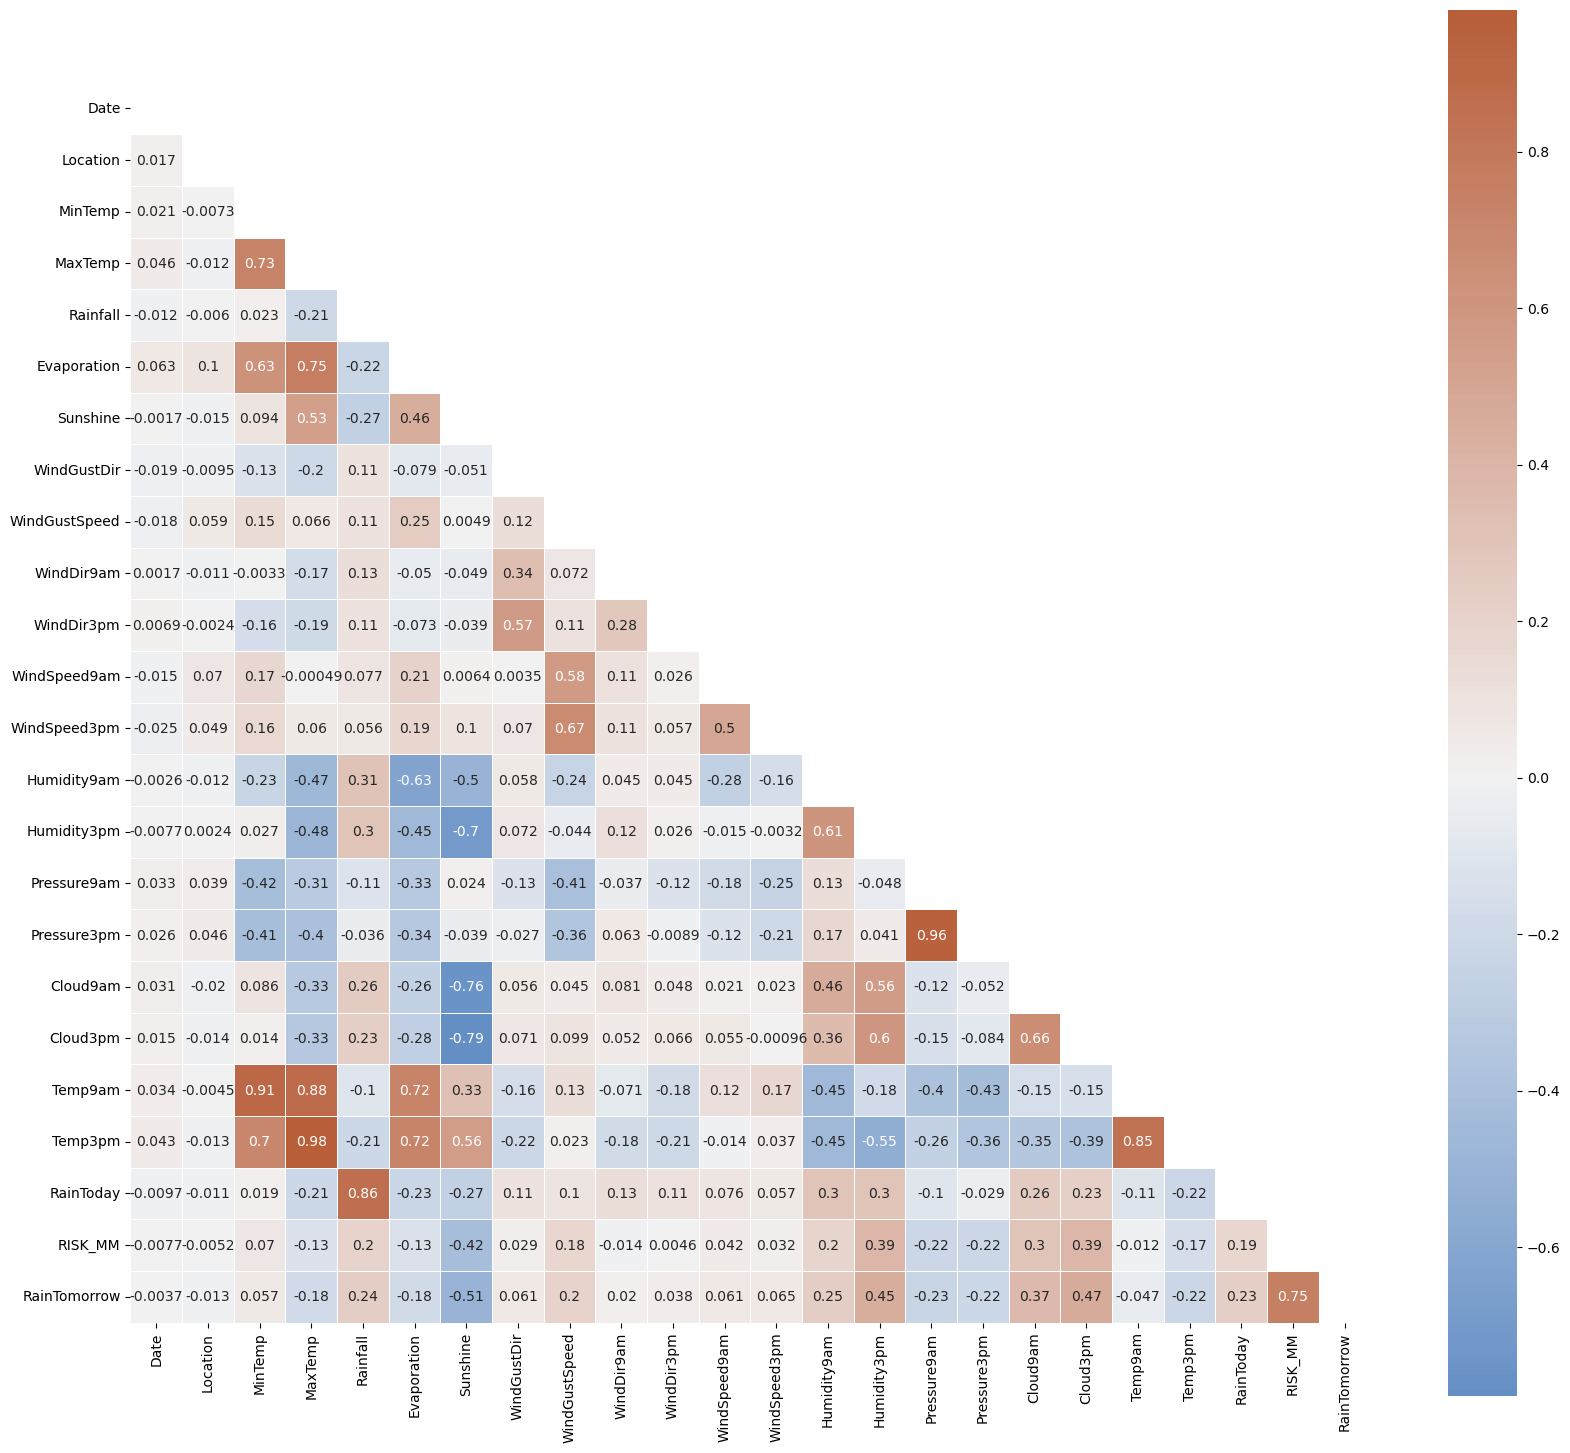

In [18]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

<div dir="rtl">

در زیر، جفت‌های ویژگی‌هایی که بین آن‌ها همبستگی بالایی وجود دارد آمده است:

* حداکثر دما و حداقل دما
* فشار ساعت 9 صبح و فشار ساعت 3 بعد از ظهر
* دما ساعت 9 صبح و دما ساعت 3 بعد از ظهر
* تبخیر و حداکثر دما
* حداکثر دما و دما ساعت 3 بعد از ظهر

اما در هیچ یک از موارد، مقدار همبستگی به صورت کاملاً "1" نیست. بنابراین هیچ ویژگی را حذف نمی‌کنیم.

با این حال، می‌توانیم به عمق در همبستگی جفتی بین این ویژگی‌های با همبستگی بالا نگاه کنیم، با توجه به نمودار جفتی زیر. هر یک از نمودارهای جفتی به وضوح خوشه‌های قابل تمییزی از "بله" و "خیر" برای باران فردا نشان می‌دهد. همگی دارای اشتراک بسیار کمی هستند.


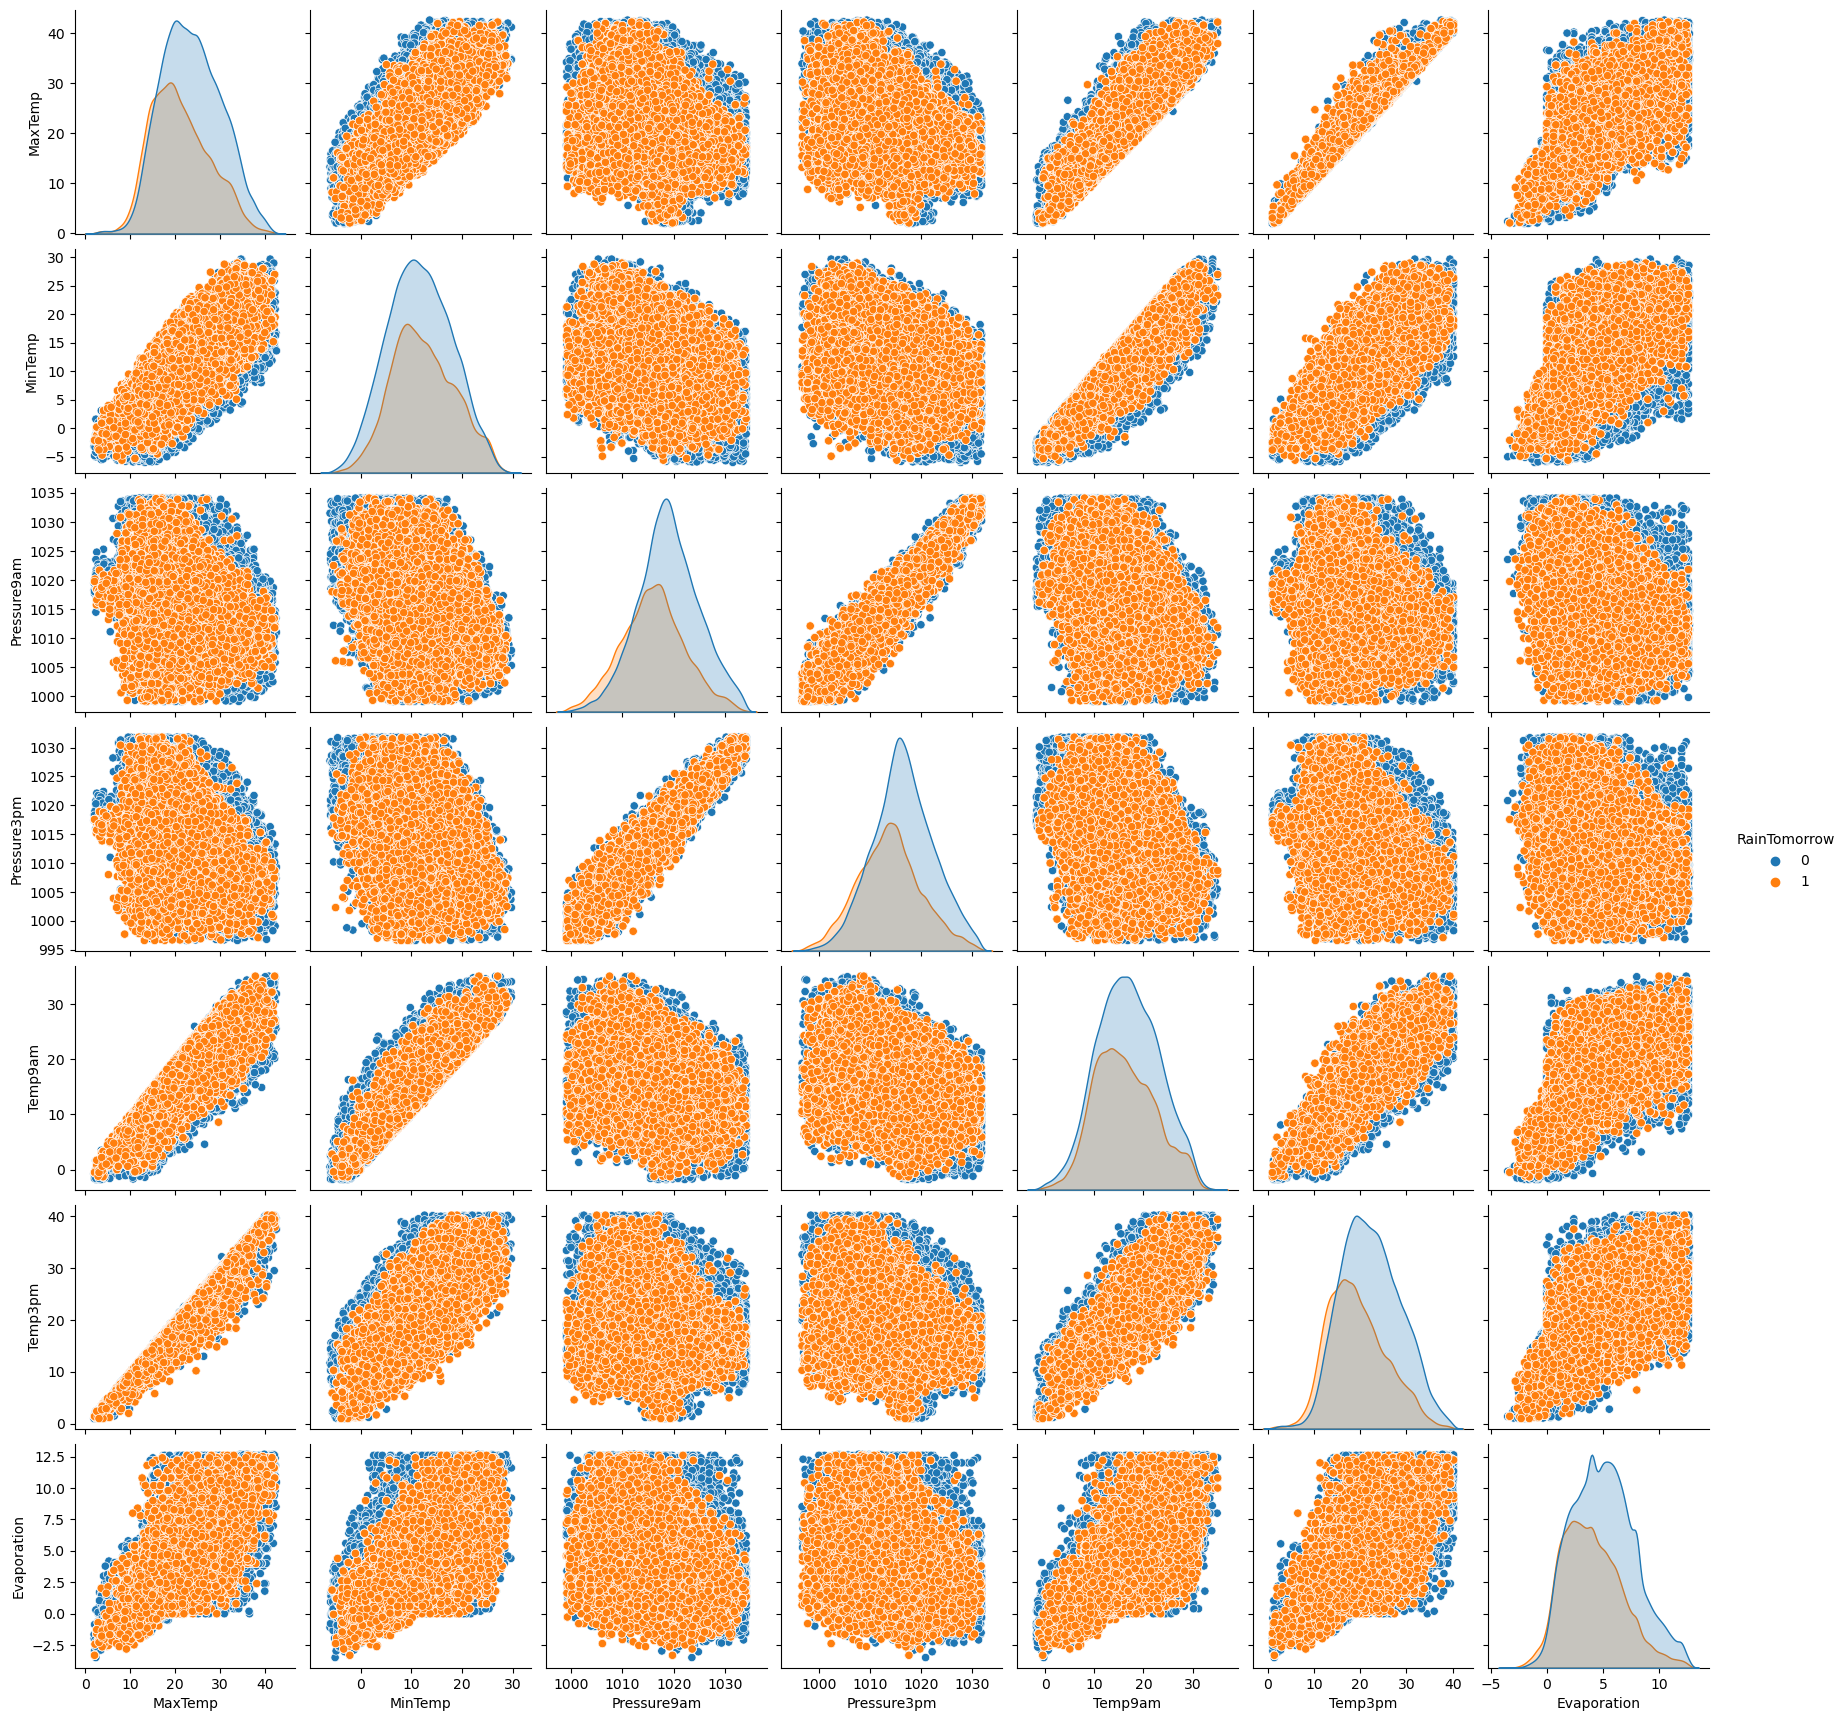

In [19]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )


<div dir="rtl">

# انتخاب ویژگی
برای انتخاب ویژگی، از روش فیلتر و روش پوشش‌دهنده استفاده خواهیم کرد.

**(1) انتخاب ویژگی با استفاده از روش فیلتر (مقدار کای-مربع):** قبل از انجام این کار، نیاز داریم که داده‌های خود را استاندارد کنیم. ما از MinMaxScaler به جای StandardScaler استفاده می‌کنیم تا از ایجاد مقادیر منفی جلوگیری کنیم.

In [20]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)
modified_data.head()

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  0.115284  0.041667  0.543417  0.514778  0.432327     0.569942  0.502581   
1  0.115575  0.041667  0.375350  0.568966  0.369252     0.564016  0.741068   
2  0.115866  0.041667  0.529412  0.583744  0.369252     0.695290  0.788183   
3  0.116157  0.041667  0.425770  0.640394  0.369252     0.584897  0.756945   
4  0.116448  0.041667  0.658263  0.746305  0.474377     0.639029  0.409215   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0     0.866667       0.521127    0.866667  ...     0.220253     0.245714   
1     0.933333       0.521127    0.400000  ...     0.250243     0.328571   
2     1.000000       0.549296    0.866667  ...     0.300227     0.242857   
3     0.266667       0.239437    0.600000  ...     0.160272     0.528571   
4     0.866667       0.478873    0.066667  ...     0.330217     0.334286   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday   RISK_MM  \
0     0.298295  0.866337  0.420182  0.506775  0.530612   0.247121  0.000000   
1     0.318182  0.338787  0.227798  0.514905  0.594388   0.247121  0.000000   
2     0.343750  0.345994  0.172605  0.617886  0.566327   0.247121  0.000000   
3     0.460227  0.296799  0.184085  0.539295  0.650510   0.247121  0.076923   
4     0.267045  0.782136  0.690418  0.531165  0.732143   0.247121  0.015385   

   RainTomorrow  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 24 columns]

In [21]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


<div dir="rtl">


می‌توانیم مشاهده کنیم که "Sunshine"، "Humidity9am"، "Humidity3pm"، "Pressure9am" و "Pressure3pm" اهمیت بالاتری نسبت به ویژگی‌های دیگر دارند.

**(2) انتخاب ویژگی با استفاده از روش Wrapper (جنگل تصادفی):**

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00205993 0.00215407 0.00259089 0.00367568 0.0102656  0.00252838
 0.05894157 0.00143001 0.00797518 0.00177178 0.00167654 0.0014278
 0.00187743 0.00760691 0.03091966 0.00830365 0.01193018 0.02113544
 0.04962418 0.00270103 0.00513723 0.00352198 0.76074491]


<div dir="rtl">


این خیلی جالب است که تمام اهمیت‌های ویژگی به جز RISK_MM به نزدیک صفر می‌رسند. این در دو حالت ممکن است رخ دهد. یا زمانی که تمام ویژگی‌ها دارای همبستگی بالا با یکدیگر باشند، یا زمانی که ویژگی‌ها در واقع اهمیت نسبی بسیار پایینی نسبت به متغیر هدف داشته باشند. از آنجا که ما در حالت قبلی همبستگی را رسم کرده‌ایم، می‌دانیم که احتمال اول درست نیست. ما با استفاده از اهمیت جابجایی (Permutation Importance) بررسی می‌کنیم که آیا احتمال دوم درست است یا خیر.

In [27]:
import warnings
warnings.filterwarnings("ignore")

<div dir="rtl">

# آموزش با مدل‌های مختلف
ما کل مجموعه داده را به دو بخش آموزش (75%) و آزمایش (25%) تقسیم می‌کنیم. برای به دست آوردن نتایج بهتر، داده‌های X_train و X_test خود را استاندارد می‌کنیم (یعنی ویژگی‌ها بدون هدف برای مجموعه‌های داده آموزش و آزمایش).

In [30]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [32]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    return model, accuracy, roc_auc, coh_kap, time_taken

<div dir="rtl">

**مدل ۱: رگرسیون لجستیک تنظیم شده توسط لسو**

Accuracy = 0.7895850865784306
ROC Area under Curve = 0.7697399338483736
Cohen's Kappa = 0.5493641860280911
Time taken = 1.6493186950683594
              precision    recall  f1-score   support

           0    0.80823   0.85936   0.83301     23948
           1    0.75505   0.68012   0.71563     15265

    accuracy                        0.78959     39213
   macro avg    0.78164   0.76974   0.77432     39213
weighted avg    0.78753   0.78959   0.78732     39213



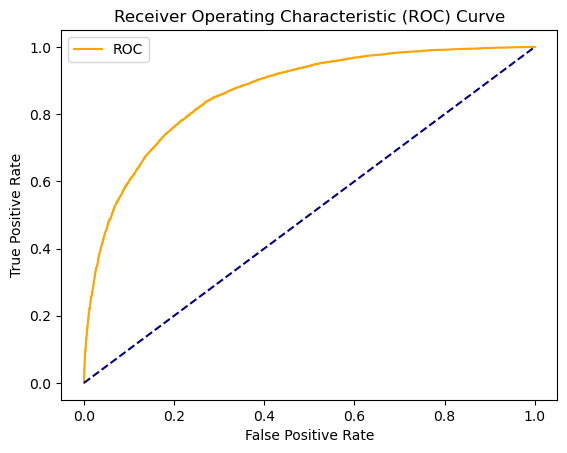

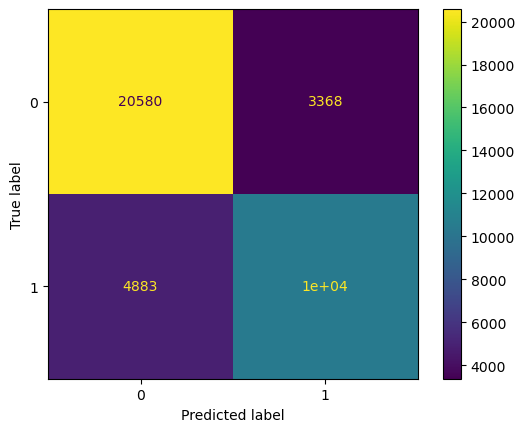

In [33]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

<div dir="rtl">

**مدل-2: درخت تصمیم**

Accuracy = 0.8556346109708515
ROC Area under Curve = 0.8537669481605822
Cohen's Kappa = 0.6997307402547257
Time taken = 0.5616519451141357
              precision    recall  f1-score   support

           0    0.89739   0.86220   0.87944     23948
           1    0.79635   0.84533   0.82011     15265

    accuracy                        0.85563     39213
   macro avg    0.84687   0.85377   0.84978     39213
weighted avg    0.85805   0.85563   0.85635     39213



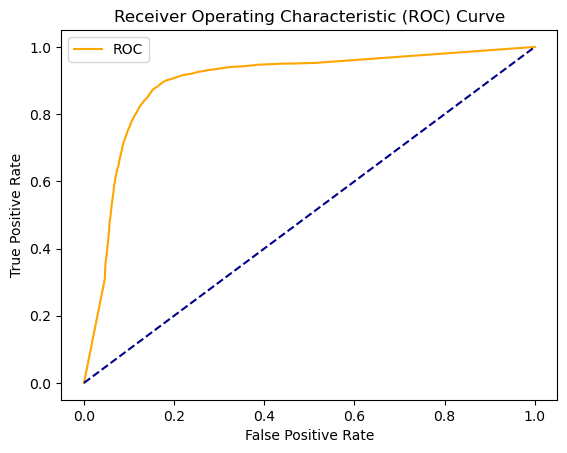

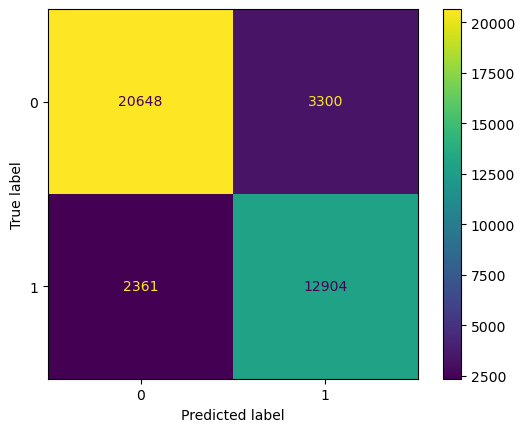

In [34]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

<div dir="rtl">

**مدل-3: شبکه عصبی (مولتی لایه پرسپترون)**

Accuracy = 0.8878433172672328
ROC Area under Curve = 0.8813716964877115
Cohen's Kappa = 0.7637956186616386
Time taken = 145.75455927848816
              precision    recall  f1-score   support

           0    0.90621   0.91060   0.90840     23948
           1    0.85867   0.85215   0.85540     15265

    accuracy                        0.88784     39213
   macro avg    0.88244   0.88137   0.88190     39213
weighted avg    0.88770   0.88784   0.88776     39213



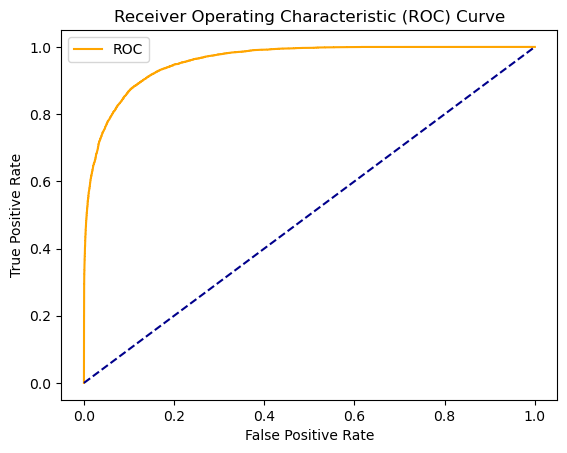

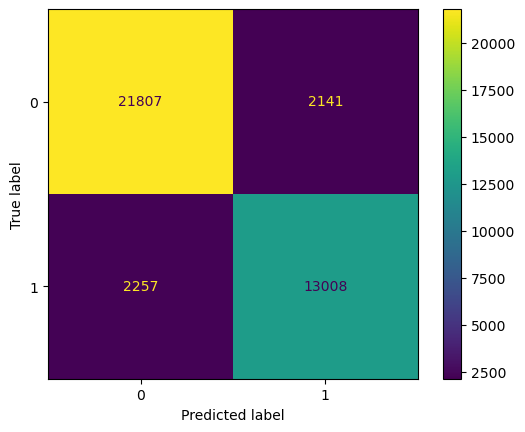

In [35]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

<div dir="rtl">

**مدل-۴: جنگل تصادفی**

Accuracy = 0.9280595720806876
ROC Area under Curve = 0.9265770863620824
Cohen's Kappa = 0.8493714659078331
Time taken = 47.49068760871887
              precision    recall  f1-score   support

           0    0.94812   0.93327   0.94064     23948
           1    0.89783   0.91988   0.90872     15265

    accuracy                        0.92806     39213
   macro avg    0.92297   0.92658   0.92468     39213
weighted avg    0.92854   0.92806   0.92821     39213



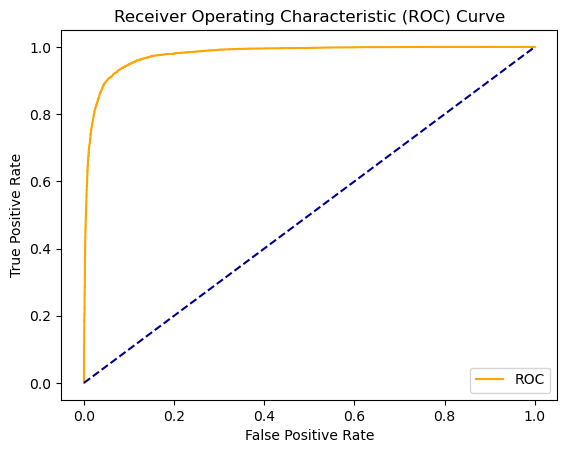

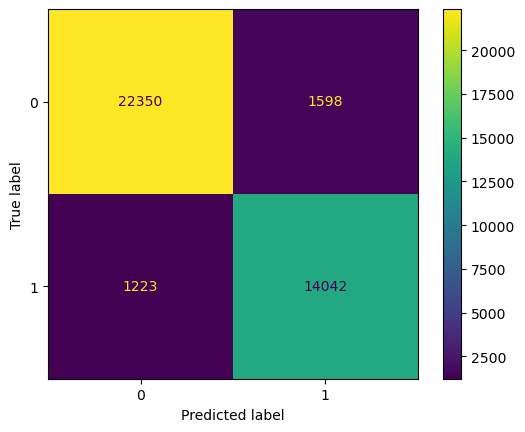

In [36]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

<div dir="rtl">


**مدل-۵: Light GBM**

[LightGBM] [Info] Number of positive: 45912, number of negative: 71727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4308
[LightGBM] [Info] Number of data points in the train set: 117639, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390279 -> initscore=-0.446141
[LightGBM] [Info] Start training from score -0.446141
Accuracy = 0.8684619896462907
ROC Area under Curve = 0.860694163700355
Cohen's Kappa = 0.7228133047900757
Time taken = 4.877975225448608
              precision    recall  f1-score   support

           0    0.88961   0.89577   0.89268     23948
           1    0.83469   0.82561   0.83013     15265

    accuracy                        0.86846     39213
   macro avg    0.86215   0.86069   0.86140     39213
weighted avg    0.86823   0.86846   0.86833     39213



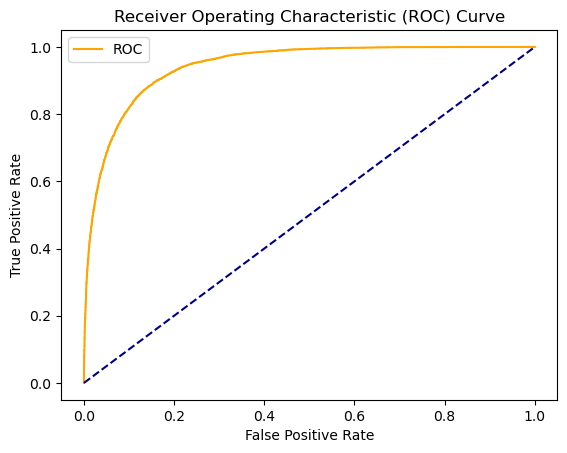

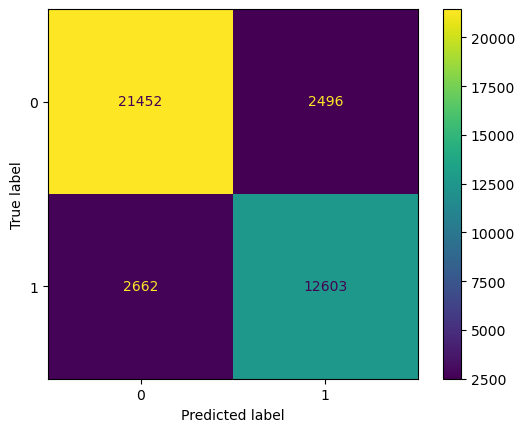

In [37]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

<div dir="rtl">

**مدل-6: CatBoost**

Accuracy = 0.9418560171371739
ROC Area under Curve = 0.9449267946584342
Cohen's Kappa = 0.8791826232502136
Time taken = 203.98721742630005
              precision    recall  f1-score   support

           0    0.97256   0.93106   0.95136     23948
           1    0.89863   0.95879   0.92774     15265

    accuracy                        0.94186     39213
   macro avg    0.93560   0.94493   0.93955     39213
weighted avg    0.94378   0.94186   0.94216     39213



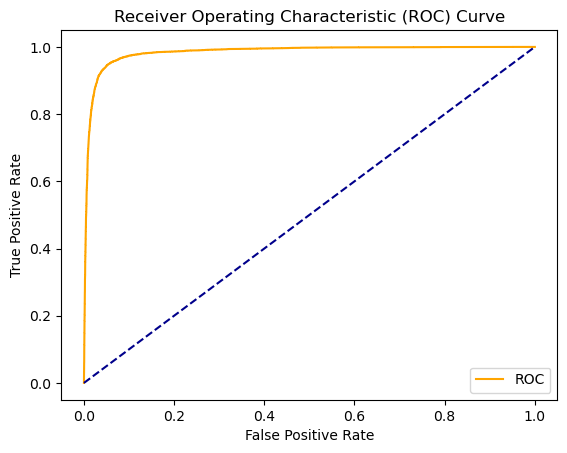

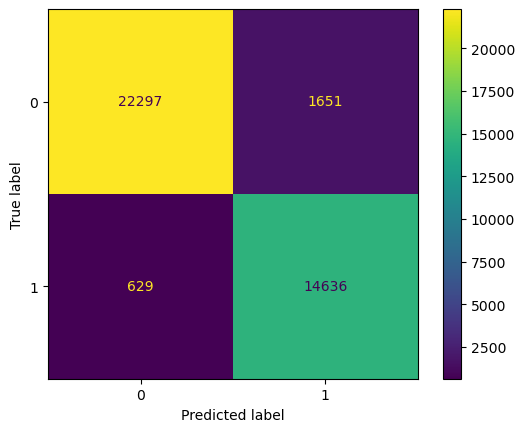

In [38]:
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

<div dir="rtl">

**مدل-7: XGBoost**

Accuracy = 0.9598347486802846
ROC Area under Curve = 0.961154451032155
Cohen's Kappa = 0.9160966204270719
Time taken = 11.275691509246826
              precision    recall  f1-score   support

           0    0.97853   0.95519   0.96672     23948
           1    0.93224   0.96711   0.94936     15265

    accuracy                        0.95983     39213
   macro avg    0.95538   0.96115   0.95804     39213
weighted avg    0.96051   0.95983   0.95996     39213



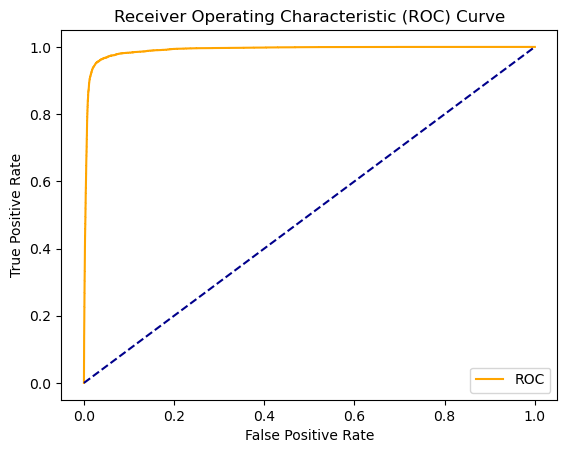

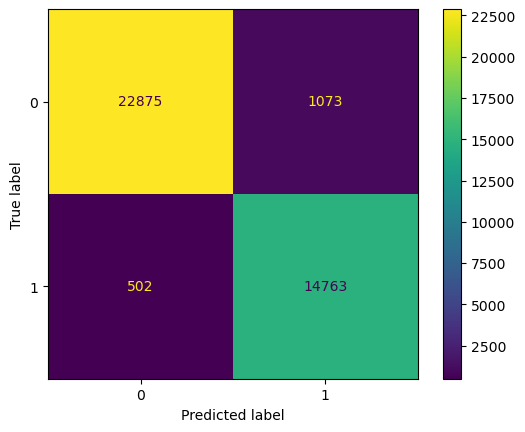

In [39]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

<div dir="rtl">

# ترسیم منطق تصمیم برای تمام مدل‌ها

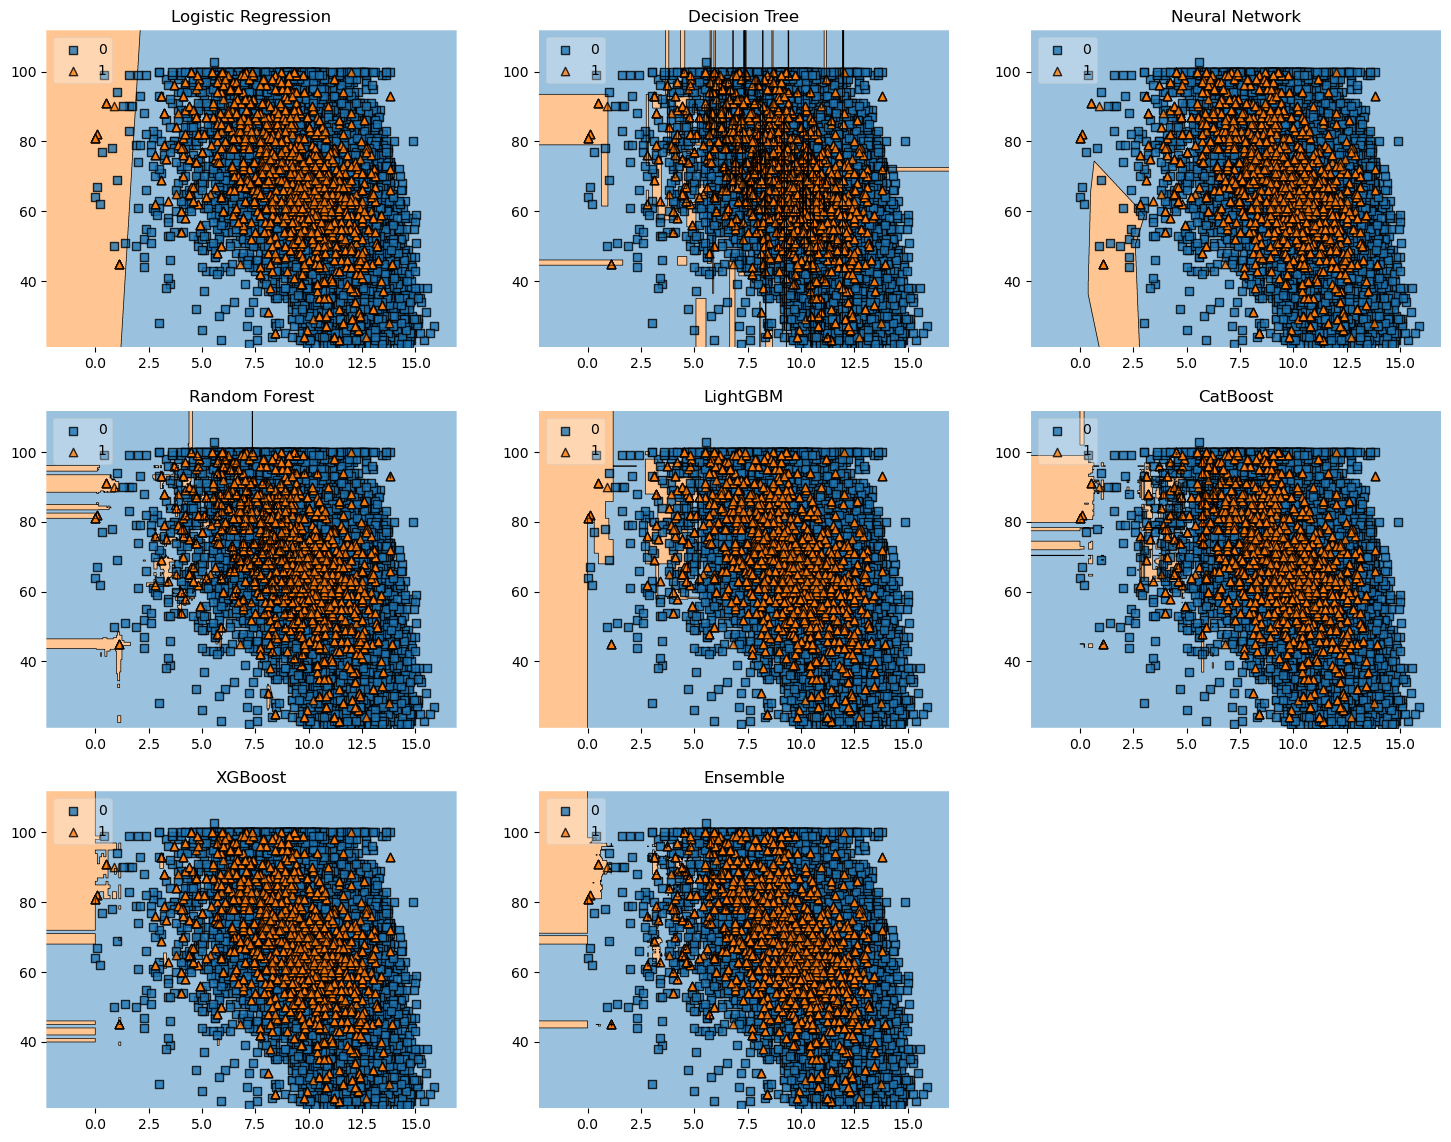

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345) 
clf3 = MLPClassifier(random_state=12345, verbose = 0)
clf4 = RandomForestClassifier(random_state=12345)
clf5 = lgb.LGBMClassifier(random_state=12345, verbose = 0)
clf6 = cb.CatBoostClassifier(random_state=12345, verbose = 0)
clf7 = xgb.XGBClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5, clf6, clf7], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'CatBoost',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

<div dir="rtl">


می‌توانیم تفاوت در مرزهای کلاس برای مدل‌های مختلف را مشاهده کنیم، از جمله مدل *انسمبل* (نمودار‌ها با در نظر گرفتن داده‌های آموزش انجام شده است). CatBoost مرز منطقه‌ای متمایزی نسبت به تمام مدل‌های دیگر دارد. با این حال، مدل‌های XGBoost و Random Forest نیز تعداد بسیار کمتری از نقاط داده‌های اشتباه طبقه‌بندی‌شده را نسبت به مدل‌های دیگر دارند.

# مقایسه مدل

حالا باید تصمیم بگیریم که کدام مدل بر اساس امتیاز دقت، ROC_AUC، کوهن's کاپا و زمان کلی اجرا بهترین عملکرد را داشته است. نکته‌ای که در اینجا قابل توجه است: می‌توانستیم F1-Score را به عنوان معیار بهتری برای ارزیابی عملکرد مدل در نظر بگیریم تا دقت، اما ما قبلاً مجموعه داده‌های نامتعادل را به یک مجموعه داده متعادل تبدیل کرده‌ایم، بنابراین در نظر گرفتن دقت به عنوان یک معیار برای تصمیم‌گیری در مورد بهترین مدل در این مورد توجیه می‌شود. برای تصمیم‌گیری بهتر، ما **"کوهن's کاپا"** را انتخاب کرده‌ایم که در واقع یک انتخاب ایده‌آل به عنوان معیار برای تصمیم‌گیری در مورد مجموعه‌های داده نامتعادل است. بیایید بررسی کنیم که کدام مدل در کدام جنبه‌ها بهتر عمل کرده است.

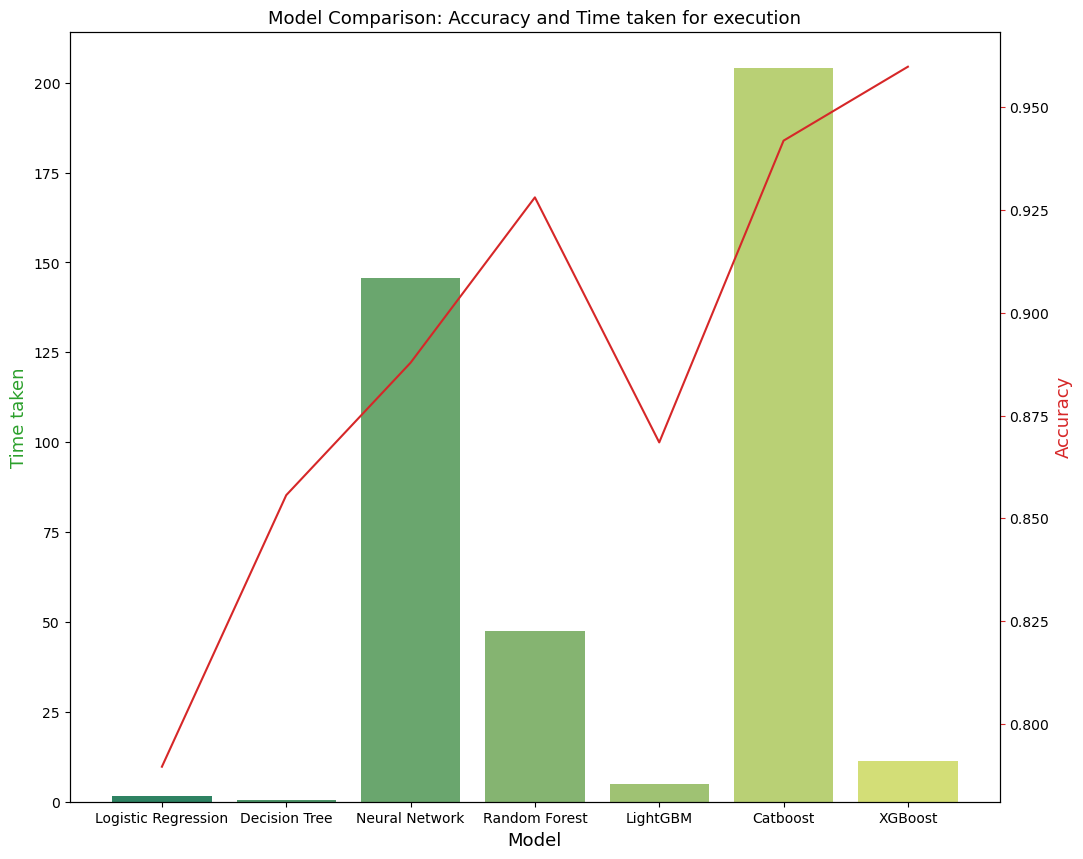

In [43]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

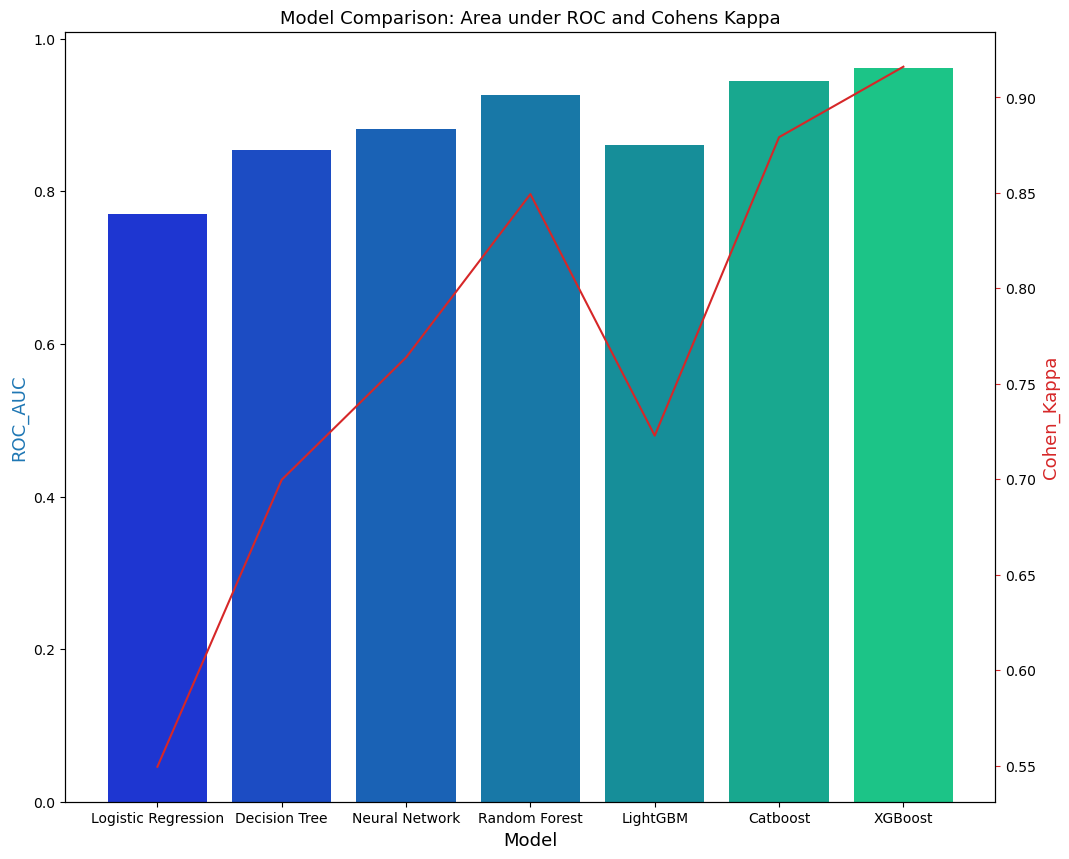

In [44]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

<div dir="rtl">

# نتیجه‌گیری
می‌توانیم مشاهده کنیم که **XGBoost، CatBoost و Random Forest** به مقایسه با مدل‌های دیگر بهتر عمل کرده‌اند. با این حال، اگر سرعت یک ملاحظه مهم باشد، می‌توانیم به جای XGBoost یا CatBoost به Random Forest پایبند باشیم.